# FITTING MOFA MODEL FOR EACH CELL LINE SEPARATELY #

In [1]:
# import liana
import liana as li
# needed for visualization and toy data
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
from scipy import sparse
import cell2cell

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import anndata
adata = anndata.read_h5ad('/root/workdir/HDAC_tfm/data/anndata/homan_adata_processed_27_05.h5ad')


In [6]:
adata.obs.columns


Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'species',
       'gene_count', 'tscp_count', 'mread_count', 'bc1_wind', 'bc2_wind',
       'bc3_wind', 'bc1_well', 'bc2_well', 'bc3_well', 'percent.mt',
       'percent.rb', 'percent.hb', 'integrated_snn_res.0.095',
       'seurat_clusters', 'integrated_snn_res.0.09', 'immuno', 'ident',
       'cell_line', 'treat'],
      dtype='object')

In [7]:
adata_kap25l = adata[adata.obs['cell_line'] == 'KAP25L'].copy()

In [8]:
adata_kuv = adata[adata.obs['cell_line'] == 'KAP25L-UV'].copy()

In [18]:
liana_df = adata_kap25l.uns['liana_res']

# Divide la columna 'sample' por el guion bajo
split_sample = liana_df['sample'].str.split('_', expand=True)

# Añade columnas temporales para facilitar el filtrado
liana_df['cell_line'] = split_sample[0]
liana_df['treat'] = split_sample[1]

# Filtra por cell_line = 'KAP25L'
liana_kap25l = liana_df[liana_df['cell_line'] == 'KAP25L'].copy()


In [19]:
adata_kap25l.uns["liana_res_filtered"] = liana_kap25l


In [20]:
liana_df = adata_kap25l.uns['liana_res']

# Divide la columna 'sample' por el guion bajo
split_sample = liana_df['sample'].str.split('_', expand=True)

# Añade columnas temporales para facilitar el filtrado
liana_df['cell_line'] = split_sample[0]
liana_df['treat'] = split_sample[1]

# Filtra por cell_line = 'KAP25L'
liana_kuv = liana_df[liana_df['cell_line'] == 'KAP25L-UV'].copy()


In [21]:
adata_kuv.uns["liana_res_filtered"] = liana_kuv


In [22]:
adata_kap25l.write('/root/workdir/HDAC_tfm/data/anndata/k25l_human_adata_processed_28_05.h5ad')

In [23]:
adata_kuv.write('/root/workdir/HDAC_tfm/data/anndata/kuv_human_adata_processed_28_05.h5ad')

In [24]:
sorted_samples_k25l = sorted(adata_kap25l.obs['treat'].unique())

In [25]:
tensor_k25l = li.multi.to_tensor_c2c(liana_res=adata_kap25l.uns['liana_res_filtered'], # LIANA's dataframe containing results
                                sample_key='treat', # Column name of the samples
                                source_key='source', # Column name of the sender cells
                                target_key='target', # Column name of the receiver cells
                                ligand_key='ligand_complex', # Column name of the ligands
                                receptor_key='receptor_complex', # Column name of the receptors
                                score_key='magnitude_rank', # Column name of the communication scores to use
                                inverse_fun=lambda x: 1 - x, # Transformation function
                                how='outer_cells', # What to include across all samples
                                outer_fraction=1/3, # Fraction of samples as threshold to include cells and LR pairs.
                                context_order=sorted_samples_k25l, # Order to store the contexts in the tensor
                               )

100%|█████████████████████████████████████████████████████████████████████████| 4/4 [03:08<00:00, 47.15s/it]


In [26]:
tensor_kuv = li.multi.to_tensor_c2c(liana_res=adata_kuv.uns['liana_res_filtered'], # LIANA's dataframe containing results
                                sample_key='treat', # Column name of the samples
                                source_key='source', # Column name of the sender cells
                                target_key='target', # Column name of the receiver cells
                                ligand_key='ligand_complex', # Column name of the ligands
                                receptor_key='receptor_complex', # Column name of the receptors
                                score_key='magnitude_rank', # Column name of the communication scores to use
                                inverse_fun=lambda x: 1 - x, # Transformation function
                                how='outer_cells', # What to include across all samples
                                outer_fraction=1/3, # Fraction of samples as threshold to include cells and LR pairs.
                                context_order=sorted_samples_k25l, # Order to store the contexts in the tensor
                               )

100%|█████████████████████████████████████████████████████████████████████████| 4/4 [03:09<00:00, 47.46s/it]


In [27]:
adata_kap25l.uns['liana_res_filtered']

,sample,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,specificity_rank,magnitude_rank,cell_line,treat
892096,KAP25L_Combination,Pro-B cells,Plasmacytoid Dendritic cells,FGF13,FGFR2,2.884825,0.0,8.225117,2.226927,2.559916,0.091161,0.931201,0.000016,5.285902e-10,KAP25L,Combination
892097,KAP25L_Combination,Pro-B cells,Pre-B cells,FGF13,FGFR1,2.808808,0.0,7.739157,2.824501,3.176927,0.177378,0.929224,0.000003,4.757263e-09,KAP25L,Combination
892098,KAP25L_Combination,Pro-B cells,Endothelial,FGF13,FGFR2,2.771544,0.0,7.500927,2.057390,2.272269,0.083134,0.928189,0.000016,8.457314e-09,KAP25L,Combination
892099,KAP25L_Combination,Pro-B cells,Natural killer cells,FGF13,FGFR2,2.747612,0.0,7.347933,2.021575,2.275634,0.081439,0.927499,0.000016,1.902876e-08,KAP25L,Combination
892100,KAP25L_Combination,Pro-B cells,Cancer cells,FGF13,FGFR2,2.746749,0.0,7.342421,2.020286,2.203820,0.081378,0.927474,0.000016,2.590013e-08,KAP25L,Combination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755779,KAP25L_control,Pre-B cells,Pre-B cells,WNT9A,FZD10_LRP5,0.095345,1.0,0.009081,-1.831452,-2.815803,0.000780,0.319692,1.000000,1.000000e+00,KAP25L,control
1755780,KAP25L_control,Pre-B cells,Pre-B cells,WNT9A,FZD10_LRP6,0.095345,1.0,0.009081,-1.831452,-2.815803,0.000780,0.319692,1.000000,1.000000e+00,KAP25L,control
1755781,KAP25L_control,Pre-B cells,Pre-B cells,WNT9A,FZD1_LRP5,0.095345,1.0,0.009081,-1.831452,-2.815803,0.000780,0.319692,1.000000,1.000000e+00,KAP25L,control
1755782,KAP25L_control,Pre-B cells,Pre-B cells,WNT9A,FZD1_LRP6,0.095345,1.0,0.009081,-1.831452,-2.815803,0.000780,0.319692,1.000000,1.000000e+00,KAP25L,control


In [47]:
context_dict_k25l = adata_kap25l.obs.sort_values(by='sample') \
                        .set_index('treat')['sample'] \
                        .to_dict()

In [48]:
context_dict_k25l

{'Combination': 'KAP25L_Combination',
 'DAC': 'KAP25L_DAC',
 'PD-L1': 'KAP25L_PD-L1',
 'control': 'KAP25L_control'}

In [53]:
context_dict_kuv = adata_kuv.obs.sort_values(by='sample') \
                        .set_index('treat')['sample'] \
                        .to_dict()

In [50]:
dimensions_dict_k25l = [context_dict_k25l, None, None, None]
meta_tensor_k25l = cell2cell.tensor.generate_tensor_metadata(interaction_tensor=tensor_k25l,
                                                  metadata_dicts=dimensions_dict_k25l,
                                                  fill_with_order_elements=True
                                                 )

In [51]:
cell2cell.io.export_variable_with_pickle(variable=tensor_k25l,
                                   filename='/root/workdir/HDAC_tfm/data/anndata/k25l_Tensor.pkl')
cell2cell.io.export_variable_with_pickle(variable=meta_tensor_k25l,
                                   filename='/root/workdir/HDAC_tfm/data/anndata/k25l_Tensor-Metadata.pkl')

/root/workdir/HDAC_tfm/data/anndata/k25l_Tensor.pkl  was correctly saved.
/root/workdir/HDAC_tfm/data/anndata/k25l_Tensor-Metadata.pkl  was correctly saved.


In [55]:
dimensions_dict_kuv = [context_dict_kuv, None, None, None]
meta_tensor_kuv = cell2cell.tensor.generate_tensor_metadata(interaction_tensor=tensor_kuv,
                                                  metadata_dicts=dimensions_dict_kuv,
                                                  fill_with_order_elements=True
                                                 )

In [56]:
cell2cell.io.export_variable_with_pickle(variable=tensor_kuv,
                                   filename='/root/workdir/HDAC_tfm/data/anndata/kuv_Tensor.pkl')
cell2cell.io.export_variable_with_pickle(variable=meta_tensor_kuv,
                                   filename='/root/workdir/HDAC_tfm/data/anndata/kuv_Tensor-Metadata.pkl')

/root/workdir/HDAC_tfm/data/anndata/kuv_Tensor.pkl  was correctly saved.
/root/workdir/HDAC_tfm/data/anndata/kuv_Tensor-Metadata.pkl  was correctly saved.


In [97]:
adata_kap25l.uns['liana_res'] = adata_kap25l.uns['liana_res_filtered']
adata_kuv.uns['liana_res'] = adata_kuv.uns['liana_res_filtered']

In [95]:
mdata_k25l = li.multi.lrs_to_views(adata_kap25l,
                              sample_key='sample',
                              score_key='magnitude_rank',
                              obs_keys=['treat'], # add those to mdata.obs
                              lr_prop = 0.3, # minimum required proportion of samples to keep an LR
                              lrs_per_sample = 20, # minimum number of interactions to keep a sample in a specific view
                              lrs_per_view = 20, # minimum number of interactions to keep a view
                              samples_per_view = 3, # NOTE: minimum number of samples to keep a view
                              min_variance = 0, # minimum variance to keep an interaction
                              lr_fill = 0, # fill missing LR values across samples with this
                              verbose=True
                              )

100%|███████████████████████████████████████████████████████████████████████| 64/64 [00:25<00:00,  2.49it/s]


In [73]:
adata_kap25l.n_obs

36676

In [98]:
mdata_kuv = li.multi.lrs_to_views(adata_kuv,
                              sample_key='sample',
                              score_key='magnitude_rank',
                              obs_keys=['treat'], # add those to mdata.obs
                              lr_prop = 0.3, # minimum required proportion of samples to keep an LR
                              lrs_per_sample = 20, # minimum number of interactions to keep a sample in a specific view
                              lrs_per_view = 20, # minimum number of interactions to keep a view
                              samples_per_view = 3, # NOTE: minimum number of samples to keep a view
                              min_variance = 0, # minimum variance to keep an interaction
                              lr_fill = 0, # fill missing LR values across samples with this
                              verbose=True
                              )

100%|███████████████████████████████████████████████████████████████████████| 64/64 [00:25<00:00,  2.49it/s]


In [99]:
import mudata

In [100]:
mdata_k25l.write("/root/workdir/HDAC_tfm/data/anndata/k25l_Mudata_human_28_05.h5mu")

In [101]:
mdata_kuv.write("/root/workdir/HDAC_tfm/data/anndata/kuv_Mudata_human_28_05.h5mu")

# MOFA

In [109]:
import muon as mu
import mofax as mofa
import mofapy2

import decoupler as dc

In [112]:
mu.tl.mofa(mdata_k25l,
           use_obs='union',
           convergence_mode='medium',
           outfile='/root/workdir/HDAC_tfm/data/anndata/MOFA/mofatalk_k25l_2f.h5ad',
           n_factors=2,
           )


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='Pro-B cells&Plasmacytoid Dendritic cells' group='group1' with N=4 samples and D=330 features...
Loaded view='Pro-B cells&Pre-B cells' group='group1' with N=4 samples and D=310 features...
Loaded view='Pro-B cells&Endothelial' group='group1' with N=4 samples and D=329 features...
Loaded view='Pro-B cells&Natural killer  cells' group='group1' with N=4 samples and D=34

In [115]:
factor_scores = li.ut.get_factor_scores(mdata_k25l, obsm_key='X_mofa', obs_keys=['treat'])
factor_scores.head(8)

,sample,Factor1,Factor2,treat
0,KAP25L_Combination,-0.179550,3.188074e-173,Combination
1,KAP25L_DAC,-0.176863,-2.911509e-173,DAC
2,KAP25L_PD-L1,0.177608,-3.410344e-174,PD-L1
3,KAP25L_control,0.179568,3.018383e-175,control


In [122]:
long_df = pd.melt(
    factor_scores,
    id_vars=['treat'],          # Columnas que no se funden
    value_vars=[col for col in factor_scores.columns if 'Factor' in col],  # Columnas de factores
    var_name='Factor',              # Nueva columna que indica el nombre del factor
    value_name='Score'              # Nueva columna con el valor del factor
)

In [120]:
import plotnine as p9

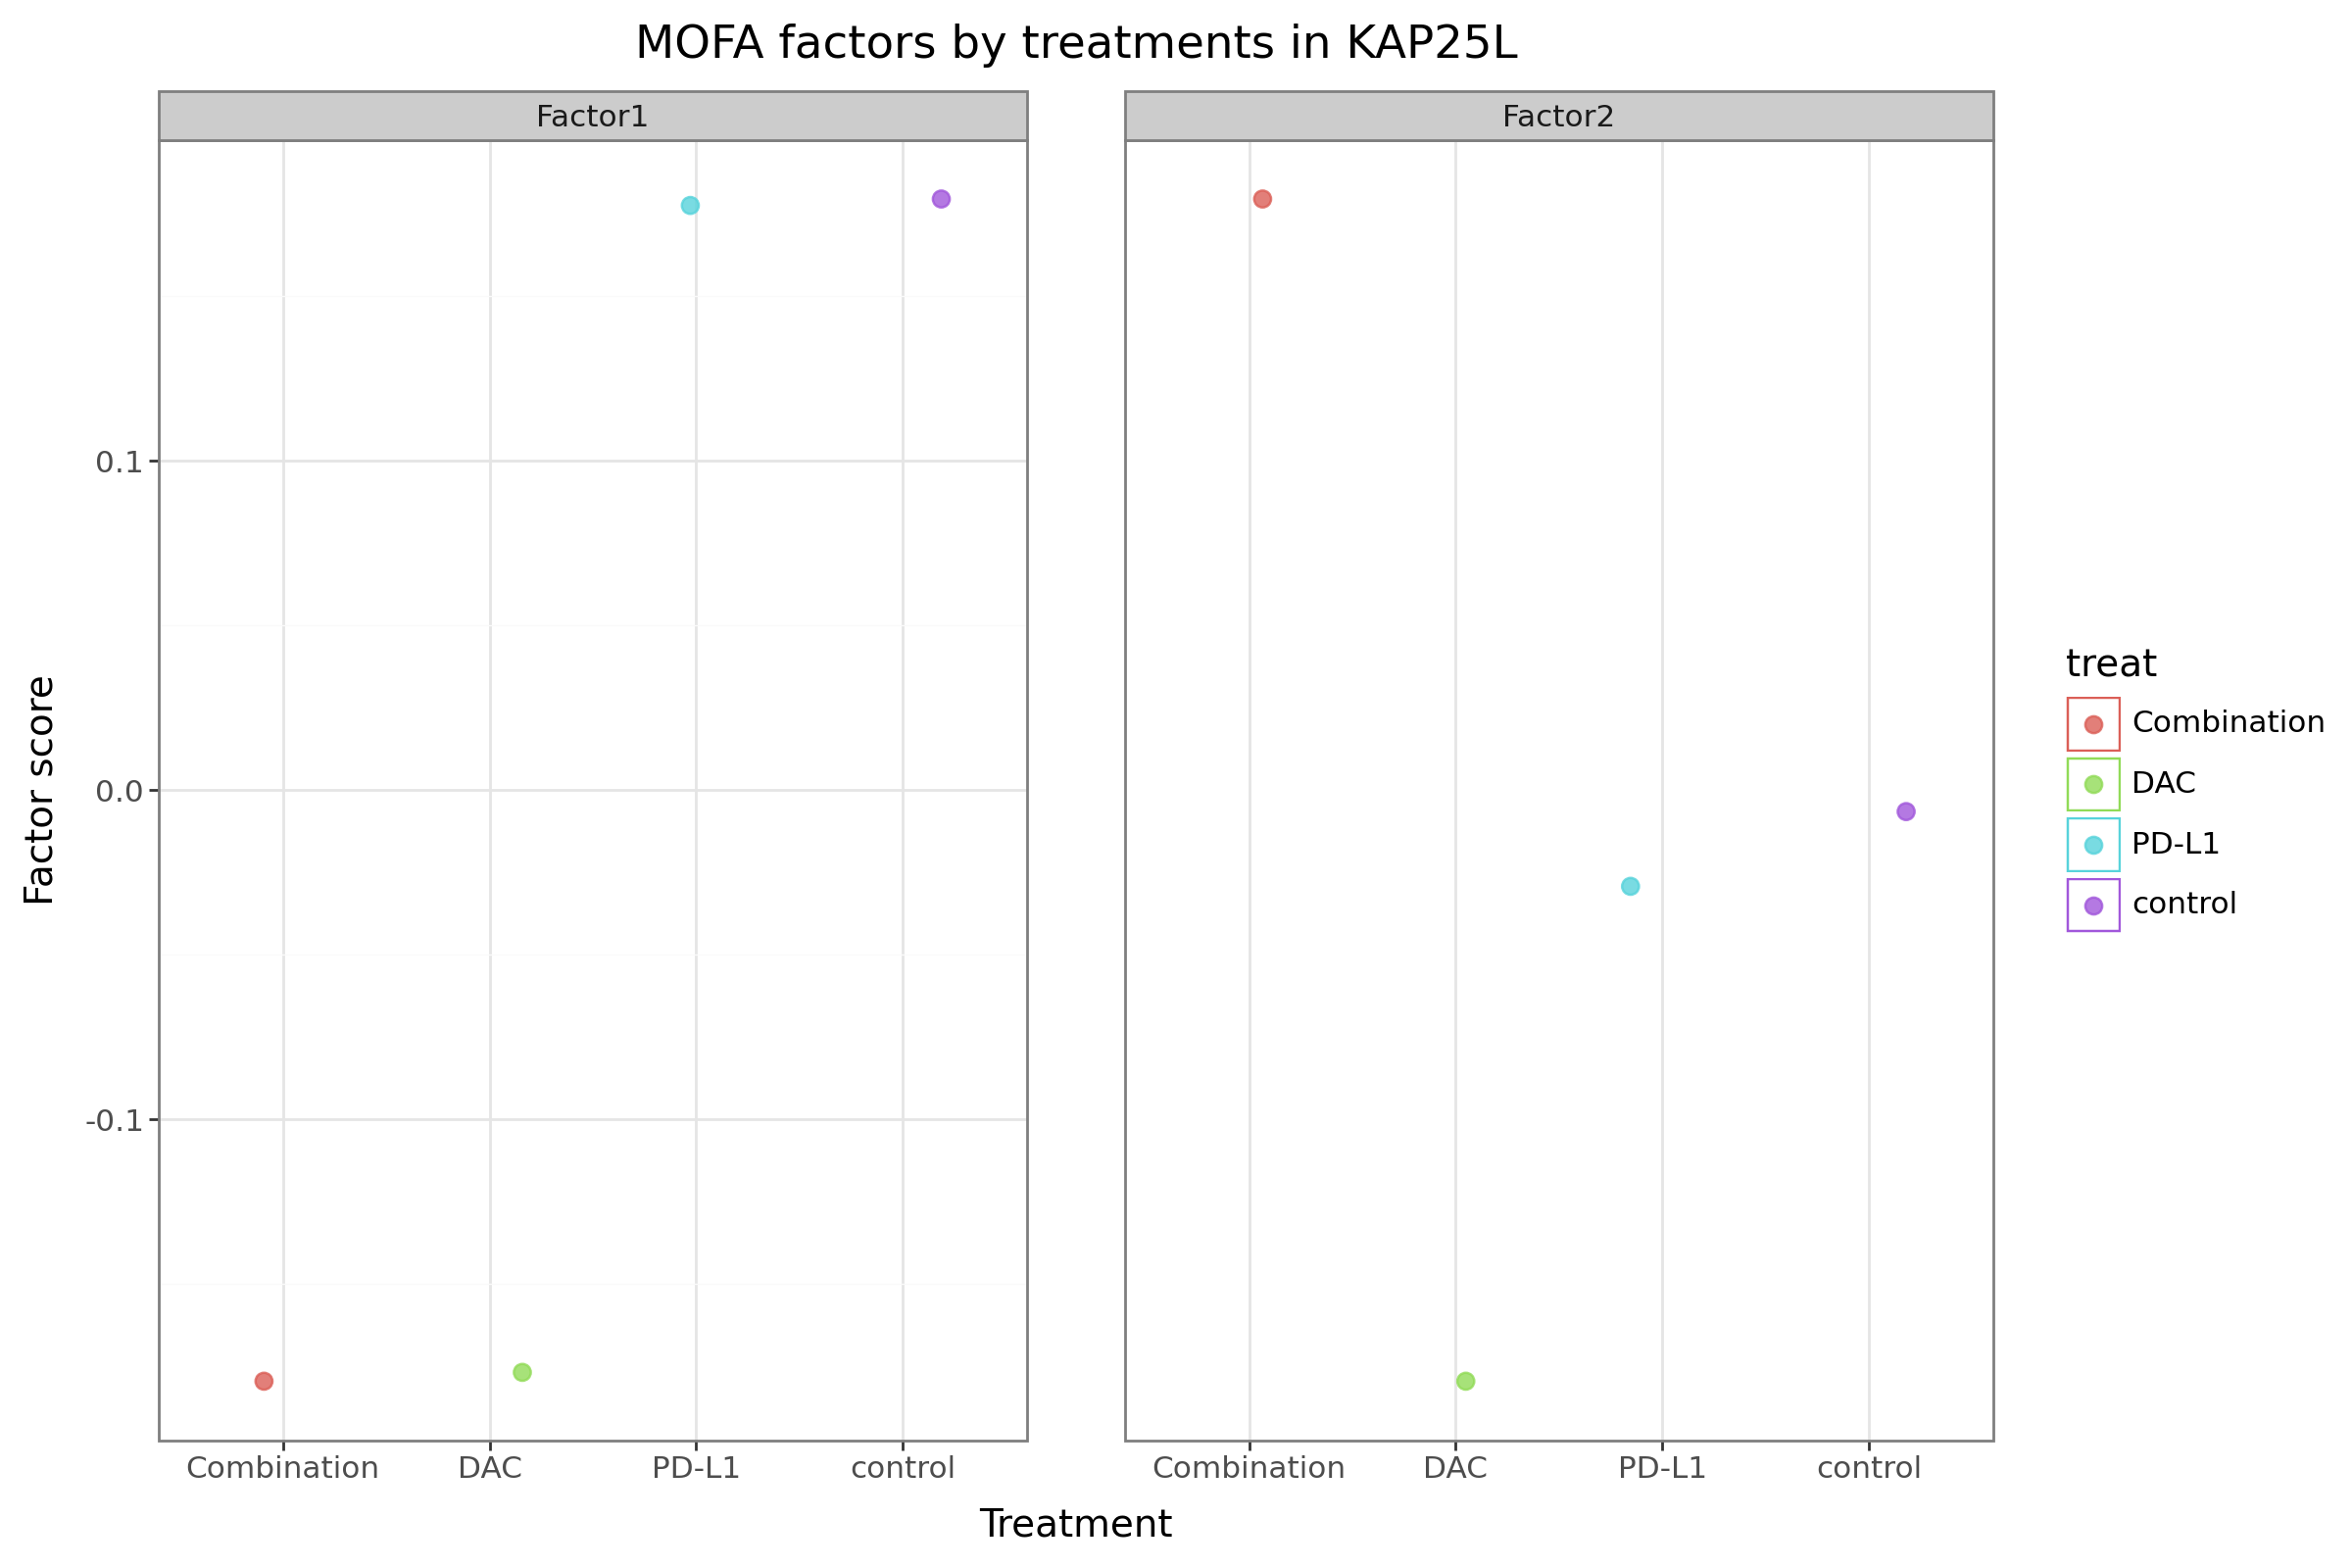

In [124]:
plot = (
    p9.ggplot(long_df) +
    p9.aes(x='treat', y='Score', colour='treat') +
    p9.geom_violin() +
    p9.geom_jitter(width=0.2, size=3, alpha=0.8) +
    p9.facet_wrap('~Factor', scales='free_y') +
    p9.theme_bw(base_size=14) +
    p9.theme(figure_size=(12, 8), subplots_adjust={'wspace': 0.25}) +
      p9.labs(x='Treatment', y='Factor score', title='MOFA factors by treatments in KAP25L')
)

plot

In [126]:
variable_loadings =  li.ut.get_variable_loadings(mdata_k25l, varm_key='LFs', view_sep=':') # get loadings
# order features by absolute value for Factor 1
variable_loadings = variable_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False)
variable_loadings.head()

,view,variable,Factor1,Factor2
25762,Naive CD8+ T cells&Endothelial,VEGFC^ITGB1,-5.947626,-3.269626e-170
24772,Naive CD8+ T cells&Natural killer cells,ANXA1^EGFR,-5.851155,2.183172e-170
27277,Naive CD8+ T cells&Macrophages,VEGFC^ITGA9,-5.716167,-2.733594e-170
24993,Naive CD8+ T cells&Natural killer cells,HSPG2^LRP1,-5.689423,2.181345e-170
26873,Naive CD8+ T cells&Cancer cells,TIMP2^ITGB1,-5.530159,-3.130942e-170


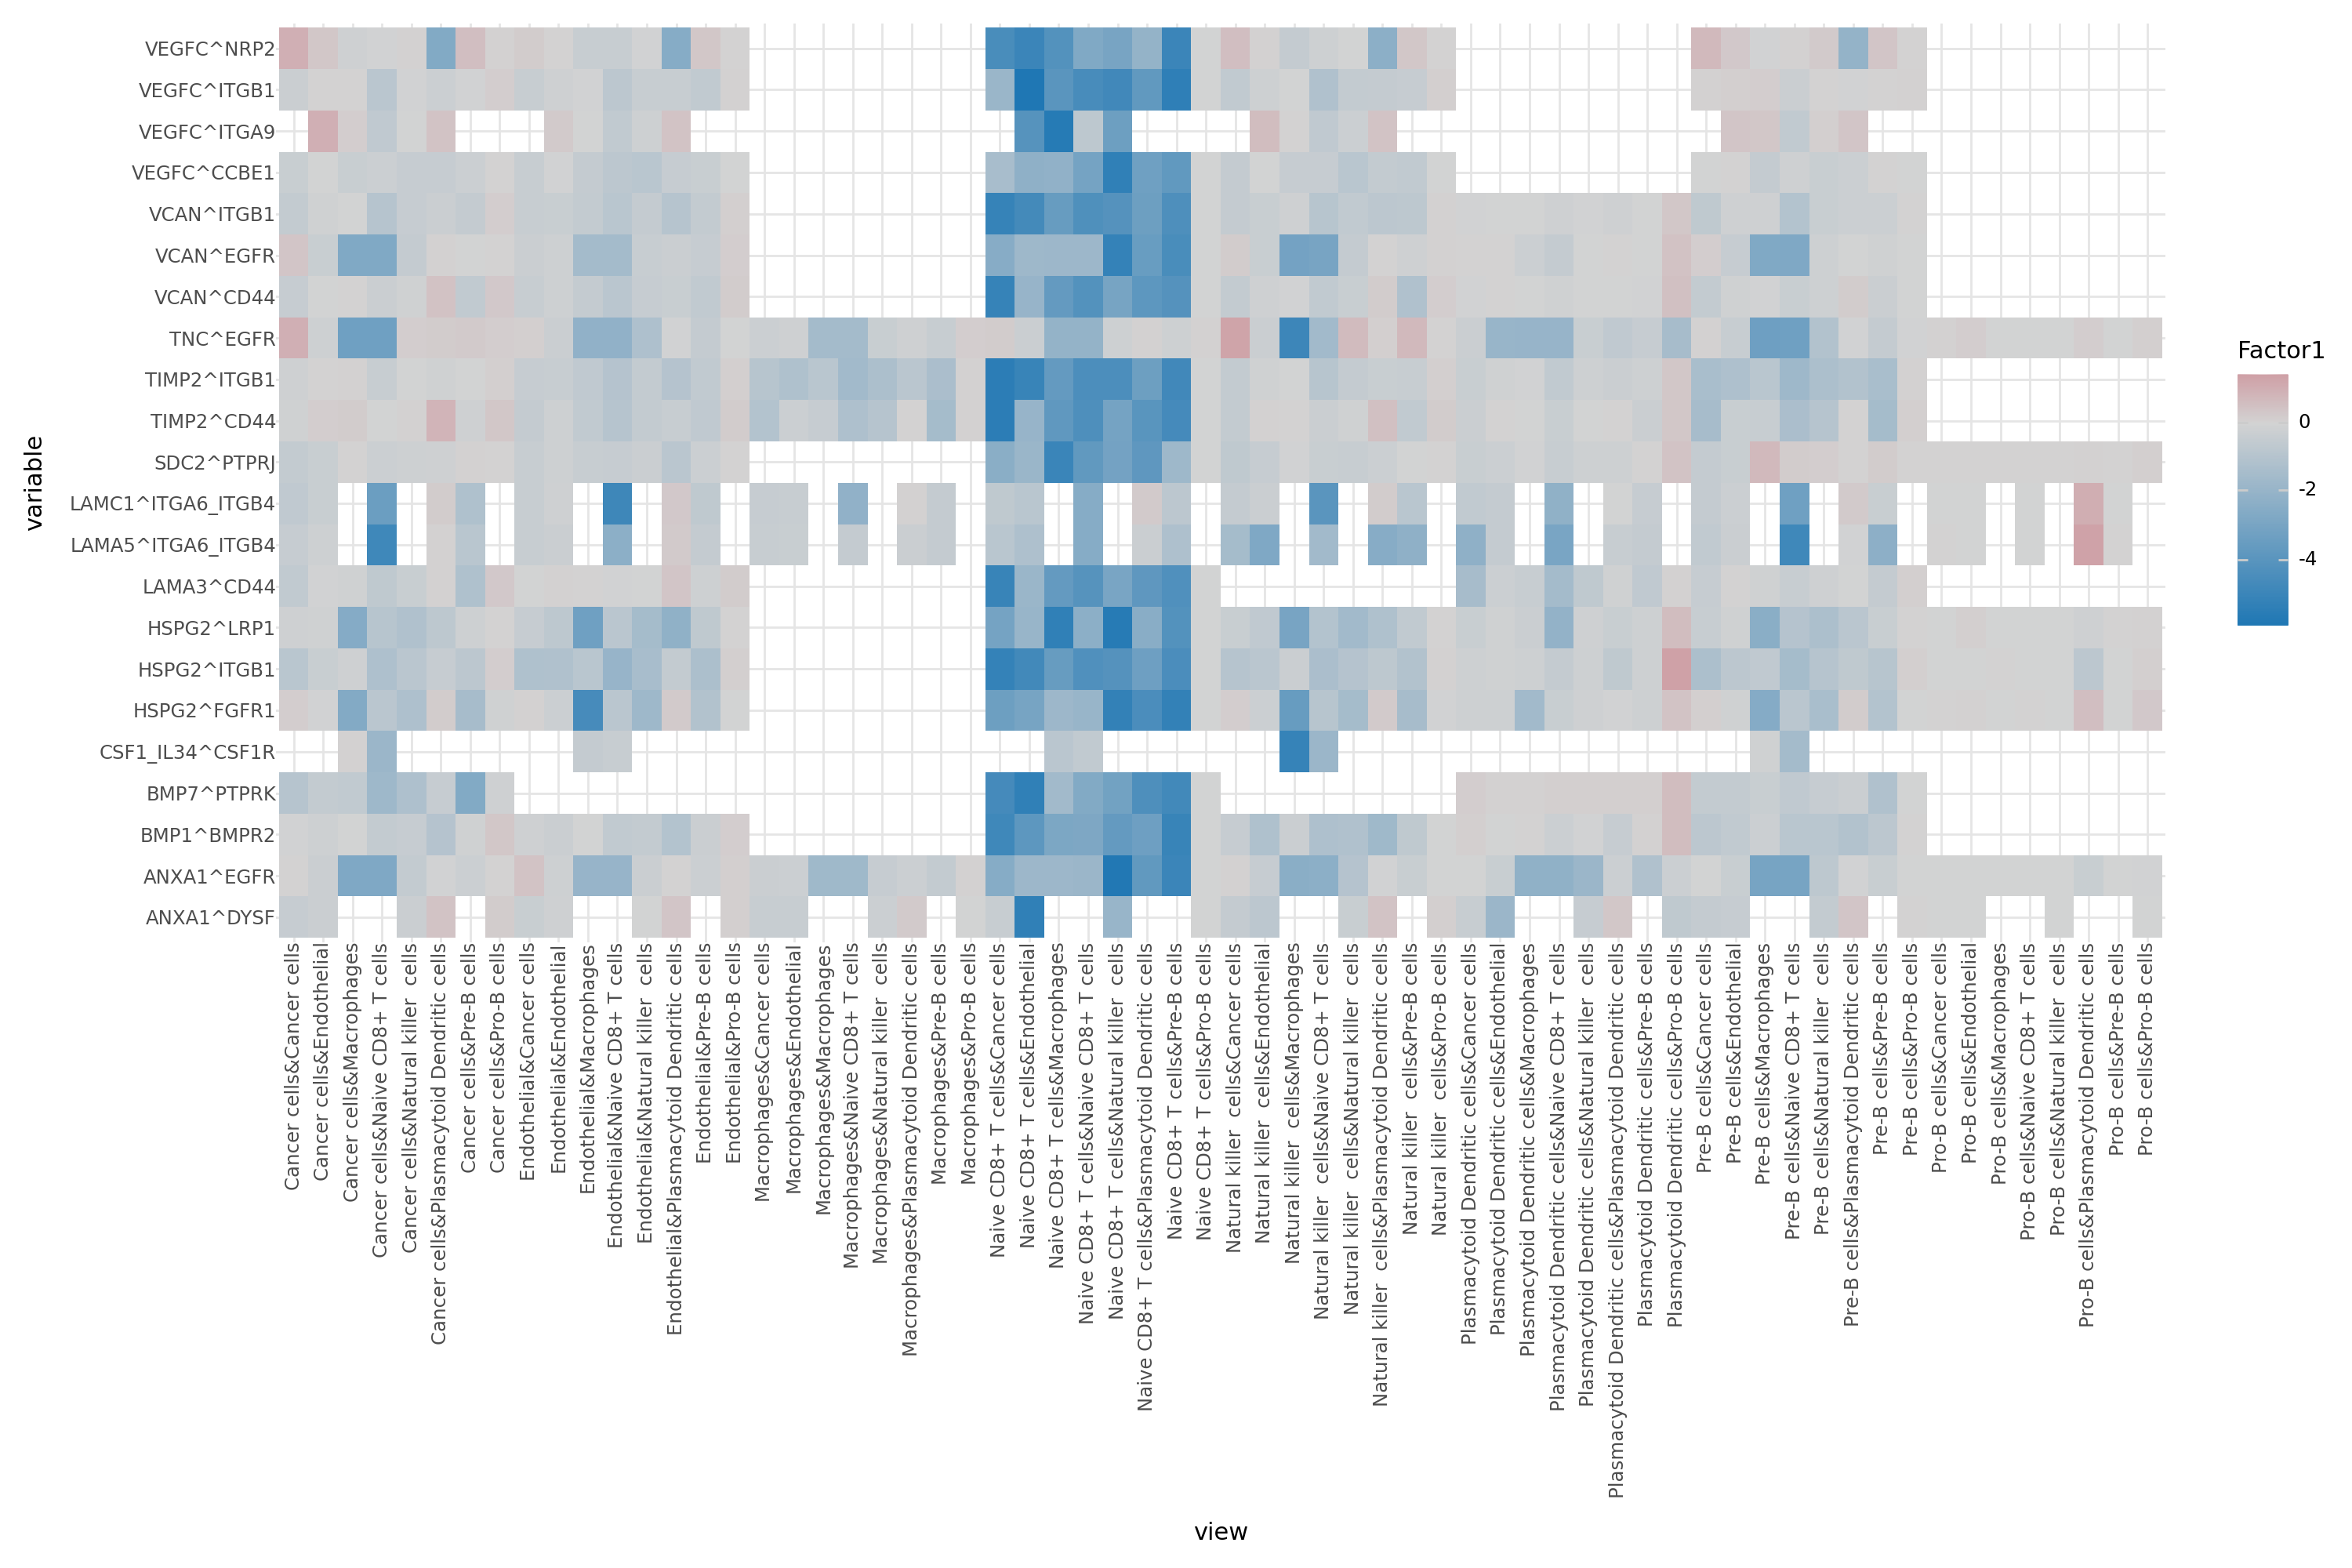

In [128]:
top_genes = variable_loadings['variable'].head(30)
top_loadings = variable_loadings[variable_loadings['variable'].isin(top_genes)]
# ^ Note that the genes with the lowest loadings are equally interesting

# plot them
# dotplot of variable, view, loadings
(p9.ggplot(top_loadings) +
 p9.aes(x='view', y='variable', fill='Factor1') +
 p9.geom_tile() +
 p9.scale_fill_gradient2(low='#1f77b4', mid='lightgray', high='#c20019') +
 p9.theme_minimal() +
 p9.theme(axis_text_x=p9.element_text(angle=90, hjust=0.5), figure_size=(15, 10))
 )

In [137]:
variable_loadings =  li.ut.get_variable_loadings(mdata_k25l,
                                                 varm_key='LFs',
                                                 view_sep=':',
                                                 pair_sep="&",
                                                 variable_sep="^") # get loadings for factor 1
variable_loadings.head()

,ligand_complex,receptor_complex,source,target,Factor1,Factor2
25762,VEGFC,ITGB1,Naive CD8+ T cells,Endothelial,-5.947626,-3.269626e-170
24772,ANXA1,EGFR,Naive CD8+ T cells,Natural killer cells,-5.851155,2.183172e-170
27277,VEGFC,ITGA9,Naive CD8+ T cells,Macrophages,-5.716167,-2.733594e-170
24993,HSPG2,LRP1,Naive CD8+ T cells,Natural killer cells,-5.689423,2.181345e-170
26873,TIMP2,ITGB1,Naive CD8+ T cells,Cancer cells,-5.530159,-3.130942e-170


In [140]:
variable_loadings['size'] = 1

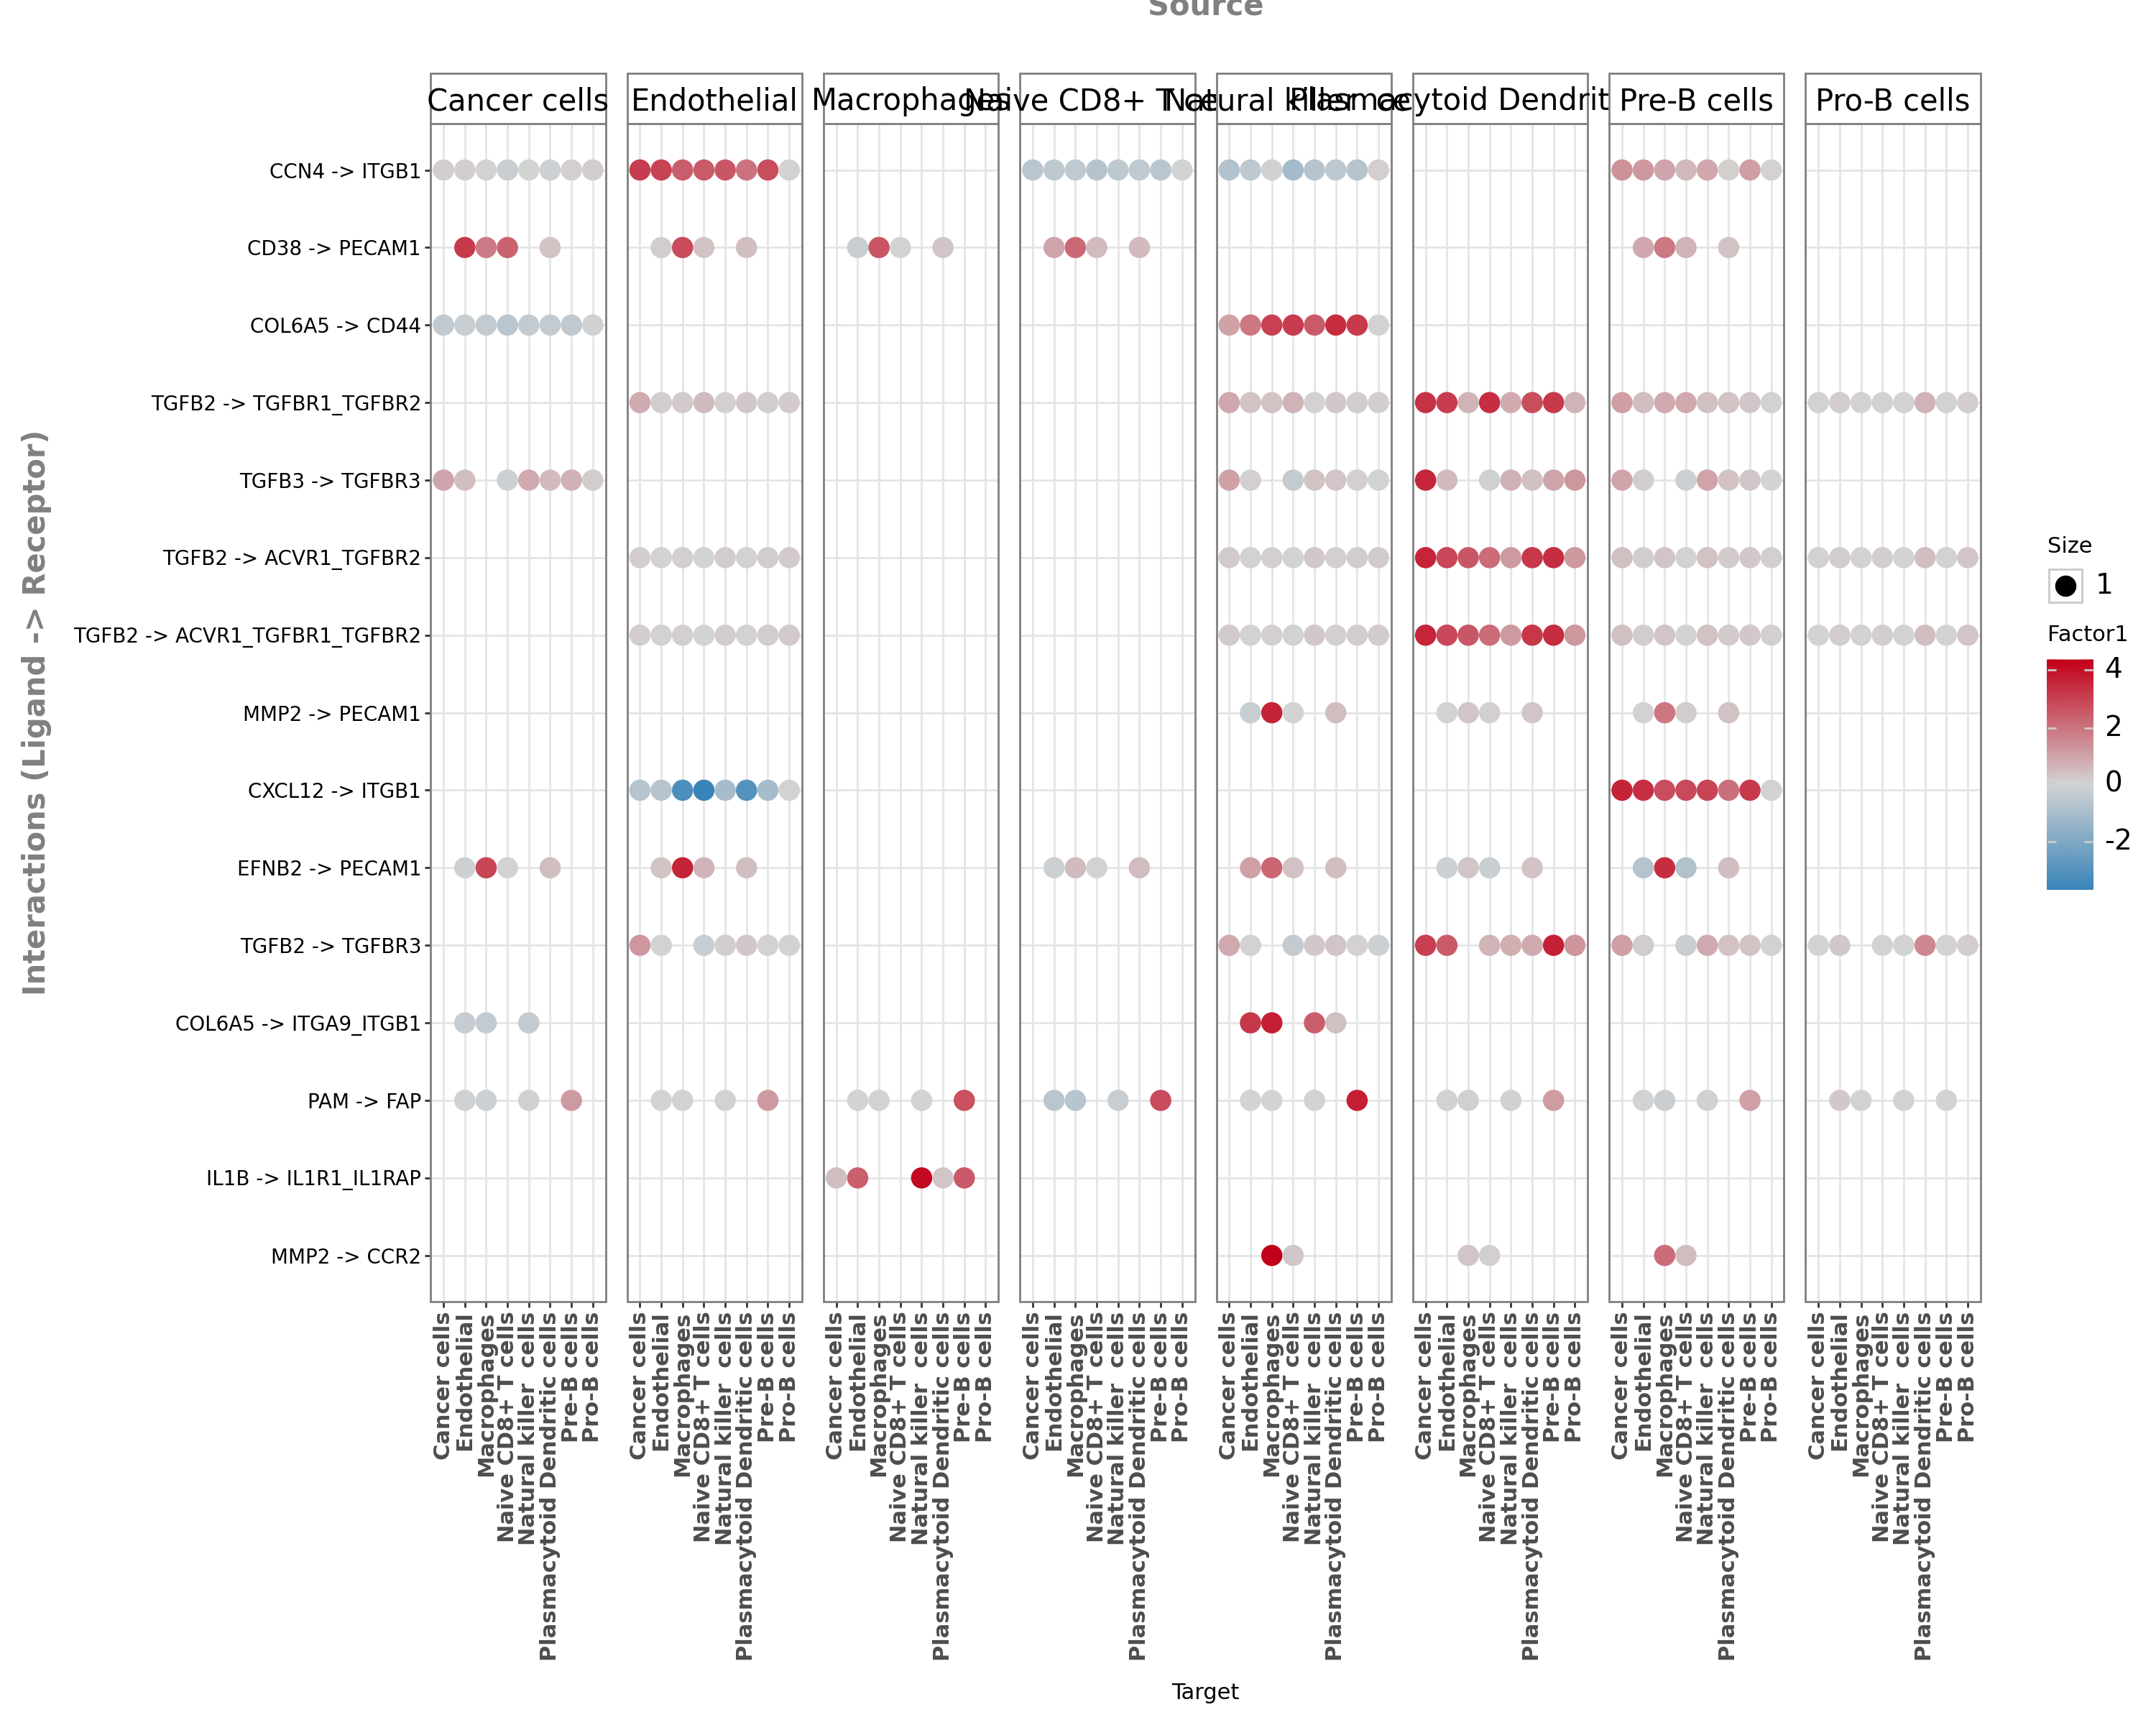

In [141]:
my_plot = li.pl.dotplot(liana_res = variable_loadings,
                        size='size',
                        colour='Factor1',
                        orderby='Factor1',
                        top_n=15,
                        orderby_ascending=False,
                        size_range=(0.1, 5),
                        figure_size=(15, 12)
                        )
# change colour, with mid as white
my_plot + p9.scale_color_gradient2(low='#1f77b4', mid='lightgray', high='#c20019')

In [130]:
model = mofa.mofa_model("/root/workdir/HDAC_tfm/data/anndata/MOFA/mofatalk_k25l_2f.h5ad")
model

MOFA+ model: mofatalk k25l 2f.h5ad
Samples (cells): 4
Features: 31529
Groups: group1 (4)
Views: Cancer cells&Cancer cells (637), Cancer cells&Endothelial (650), Cancer cells&Macrophages (442), Cancer cells&Naive CD8+ T cells (664), Cancer cells&Natural killer  cells (685), Cancer cells&Plasmacytoid Dendritic cells (662), Cancer cells&Pre-B cells (627), Cancer cells&Pro-B cells (406), Endothelial&Cancer cells (491), Endothelial&Endothelial (534), Endothelial&Macrophages (362), Endothelial&Naive CD8+ T cells (537), Endothelial&Natural killer  cells (545), Endothelial&Plasmacytoid Dendritic cells (512), Endothelial&Pre-B cells (483), Endothelial&Pro-B cells (305), Macrophages&Cancer cells (348), Macrophages&Endothelial (337), Macrophages&Macrophages (274), Macrophages&Naive CD8+ T cells (372), Macrophages&Natural killer  cells (342), Macrophages&Plasmacytoid Dendritic cells (337), Macrophages&Pre-B cells (331), Macrophages&Pro-B cells (209), Naive CD8+ T cells&Cancer cells (518), Naive CD

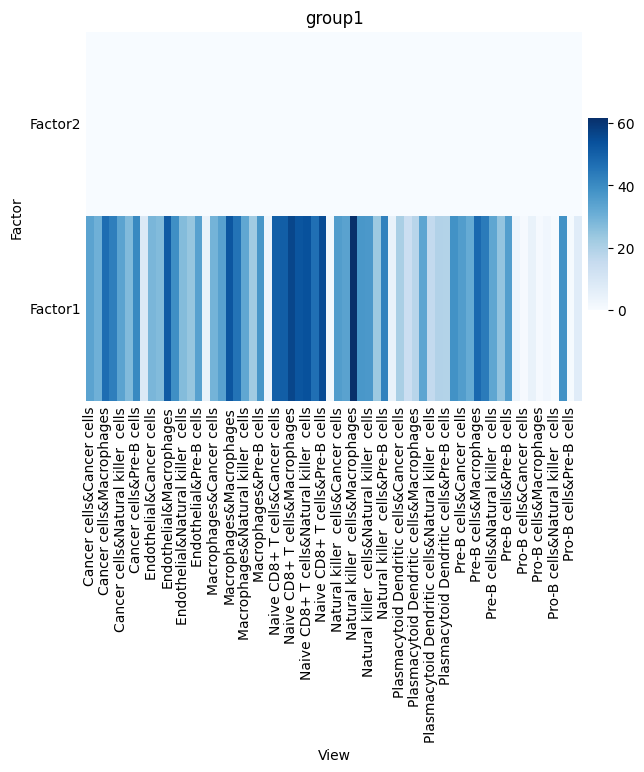

In [132]:
mofa.plot_r2(model, x='View')

The NK cells → macrophages interaction exhibits the highest variance explained by factor 1 of the model, indicating that the main source of variability in this view is associated with the difference between control and treatment samples. However, this interaction is not statistically significant, as the overall model does not reach significance.

In [170]:
mu.tl.mofa(mdata_kuv,
           use_obs='union',
           convergence_mode='medium',
           outfile='/root/workdir/HDAC_tfm/data/anndata/MOFA/mofatalk_kuv_2f.h5ad',
           n_factors=2,
           )


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='Macrophages&Naive CD8+ T cells' group='group1' with N=4 samples and D=283 features...
Loaded view='Natural killer  cells&Pre-B cells' group='group1' with N=4 samples and D=557 features...
Loaded view='Pro-B cells&Plasmacytoid Dendritic cells' group='group1' with N=4 samples and D=413 features...
Loaded view='Pro-B cells&Pre-B cells' group='group1' with N=4 samples a

In [172]:
factor_scores = li.ut.get_factor_scores(mdata_kuv, obsm_key='X_mofa', obs_keys=['treat'])
factor_scores.head(8)

,sample,Factor1,Factor2,treat
0,KAP25L-UV_Combination,0.168000,0.083066,Combination
1,KAP25L-UV_DAC,0.153006,0.083261,DAC
2,KAP25L-UV_PD-L1,-0.401249,0.083121,PD-L1
3,KAP25L-UV_control,0.080243,-0.249448,control


In [173]:
long_df = pd.melt(
    factor_scores,
    id_vars=['treat'],          # Columnas que no se funden
    value_vars=[col for col in factor_scores.columns if 'Factor' in col],  # Columnas de factores
    var_name='Factor',              # Nueva columna que indica el nombre del factor
    value_name='Score'              # Nueva columna con el valor del factor
)

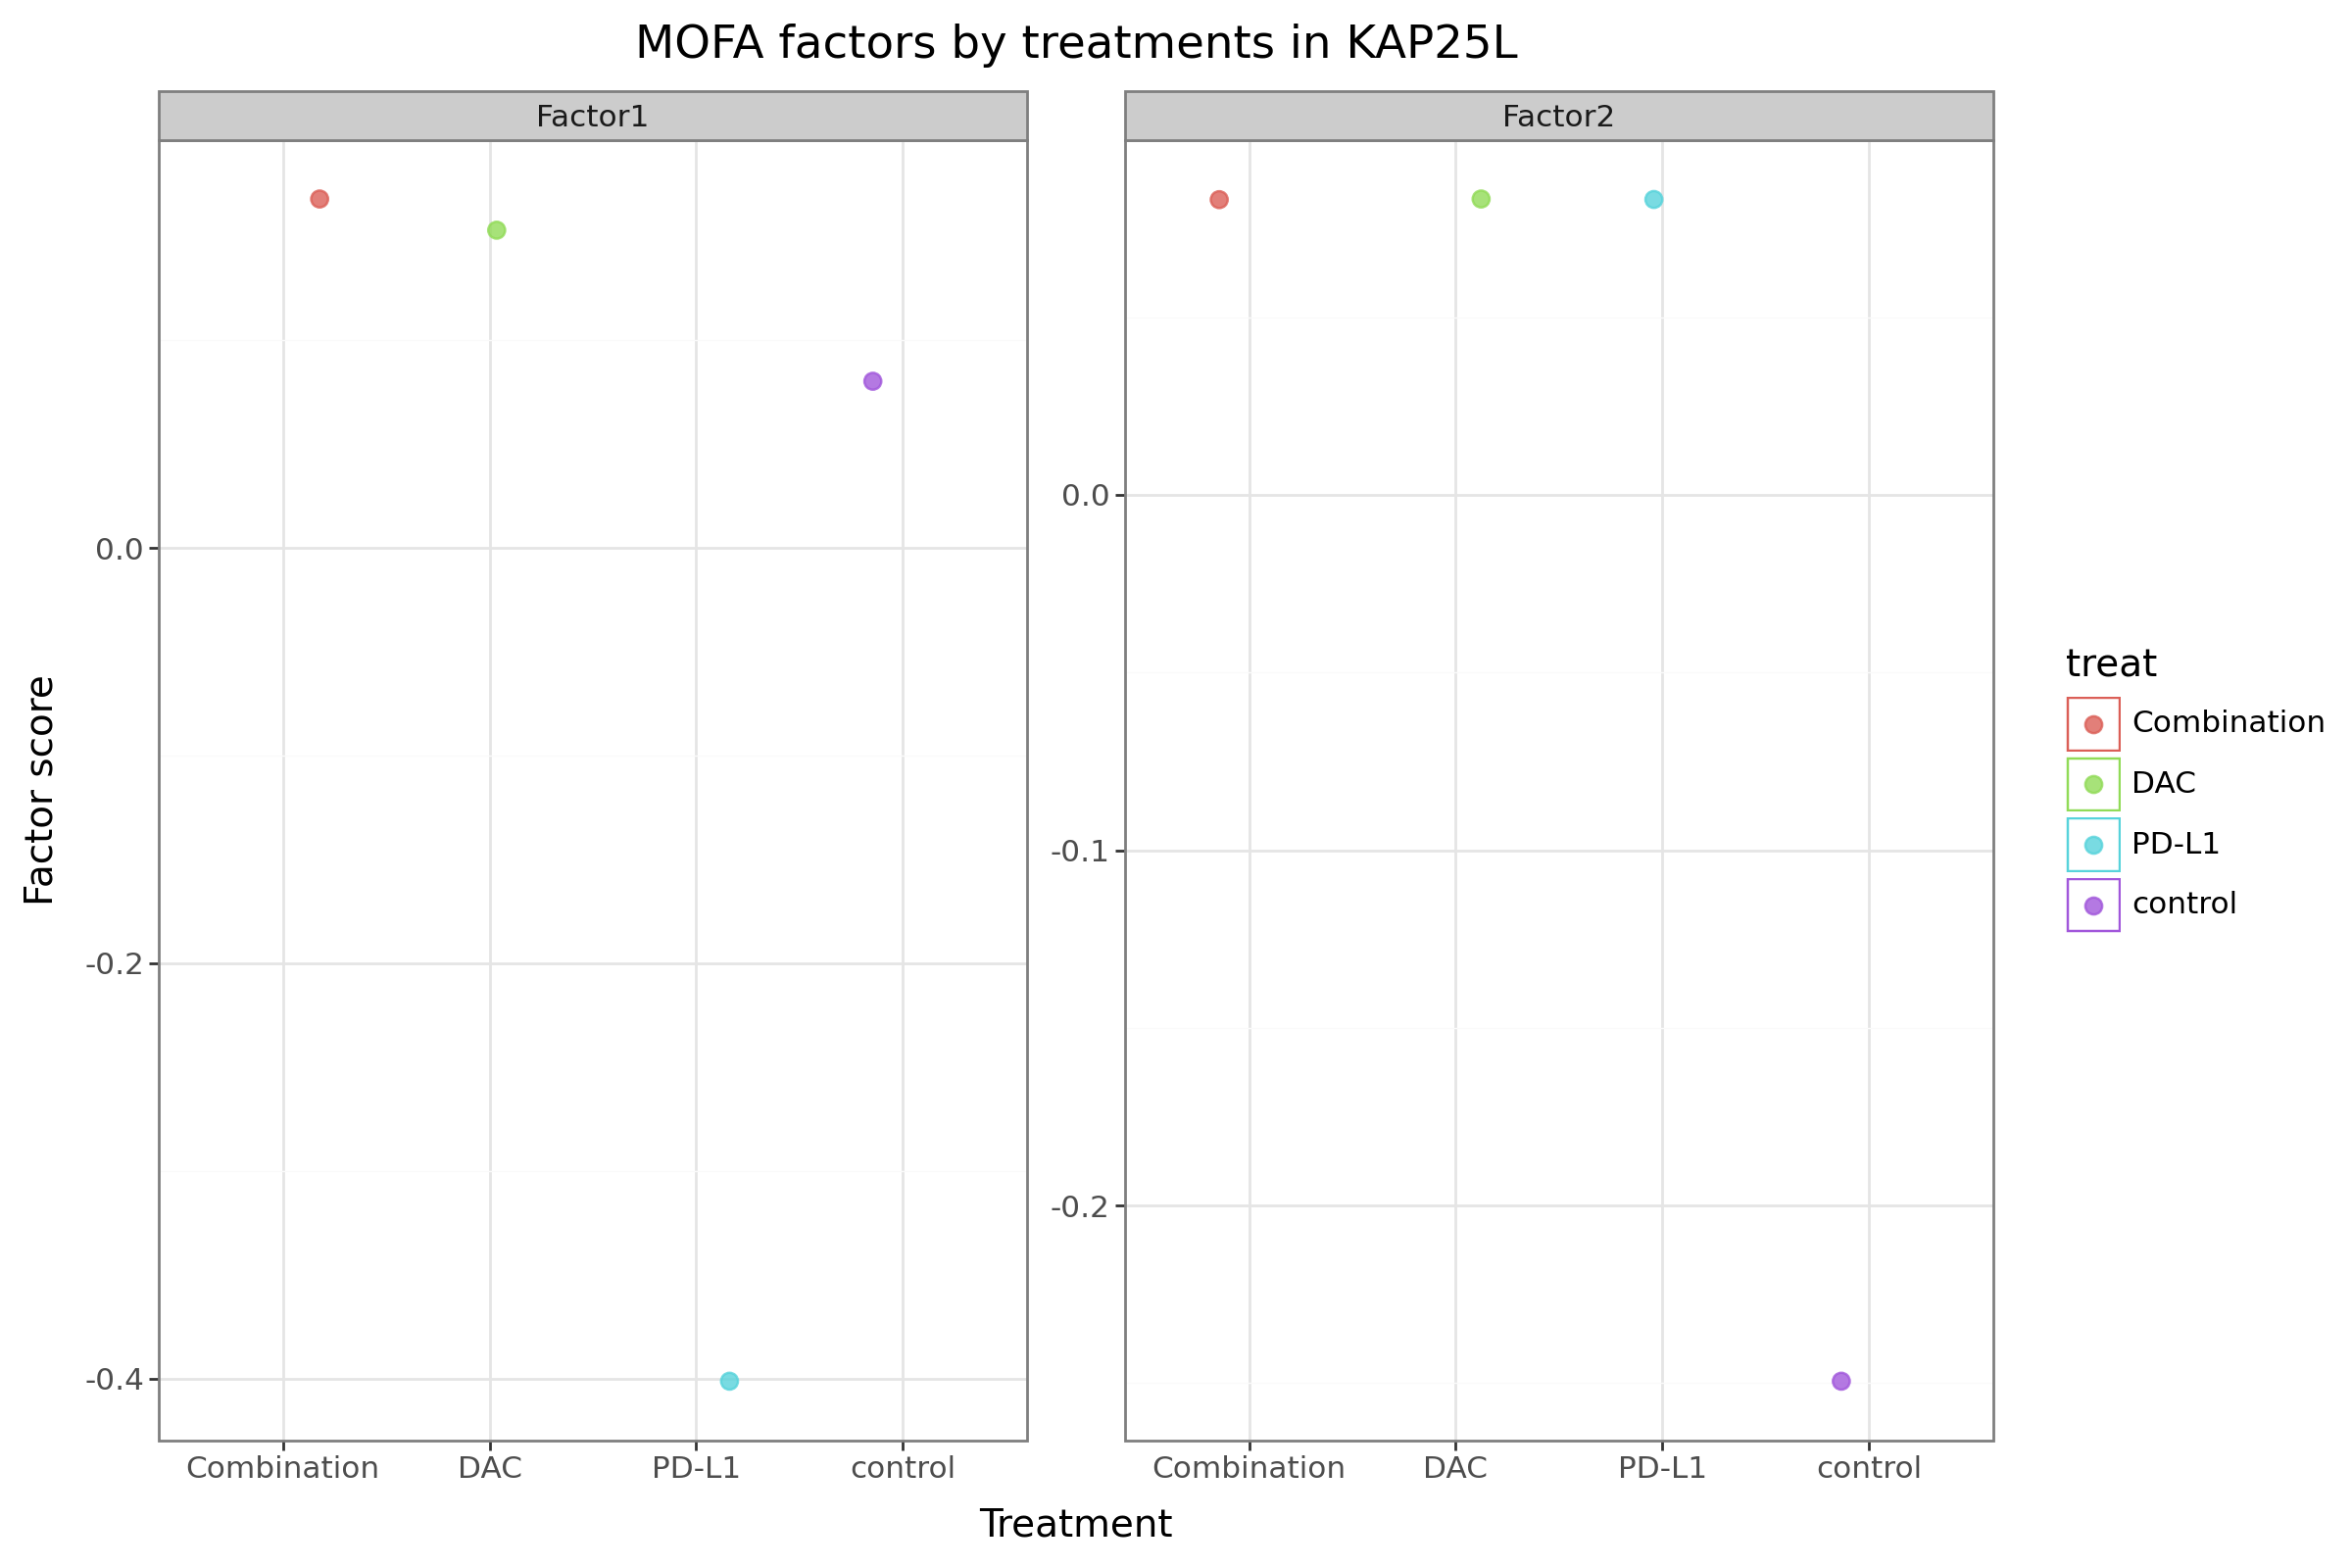

In [174]:
plot = (
    p9.ggplot(long_df) +
    p9.aes(x='treat', y='Score', colour='treat') +
    p9.geom_violin() +
    p9.geom_jitter(width=0.2, size=3, alpha=0.8) +
    p9.facet_wrap('~Factor', scales='free_y') +
    p9.theme_bw(base_size=14) +
    p9.theme(figure_size=(12, 8), subplots_adjust={'wspace': 0.25}) +
      p9.labs(x='Treatment', y='Factor score', title='MOFA factors by treatments in KAP25L')
)

plot

In [179]:
variable_loadings =  li.ut.get_variable_loadings(mdata_kuv, varm_key='LFs', view_sep=':') # get loadings
# order features by absolute value for Factor 1
variable_loadings = variable_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False)
variable_loadings.head()

,view,variable,Factor1,Factor2
8590,Pre-B cells&Macrophages,FN1^C5AR1,5.150057,1.447639
5526,Pre-B cells&Pre-B cells,COL5A2^ITGA10_ITGB1,4.101698,0.365321
11794,Pre-B cells&Naive CD8+ T cells,FN1^ITGA2,4.073690,0.023519
5449,Pre-B cells&Pre-B cells,CCN1^ITGB5,4.063471,0.964118
12801,Natural killer cells&Naive CD8+ T cells,COL12A1^ITGA2_ITGB1,4.061654,-0.242464


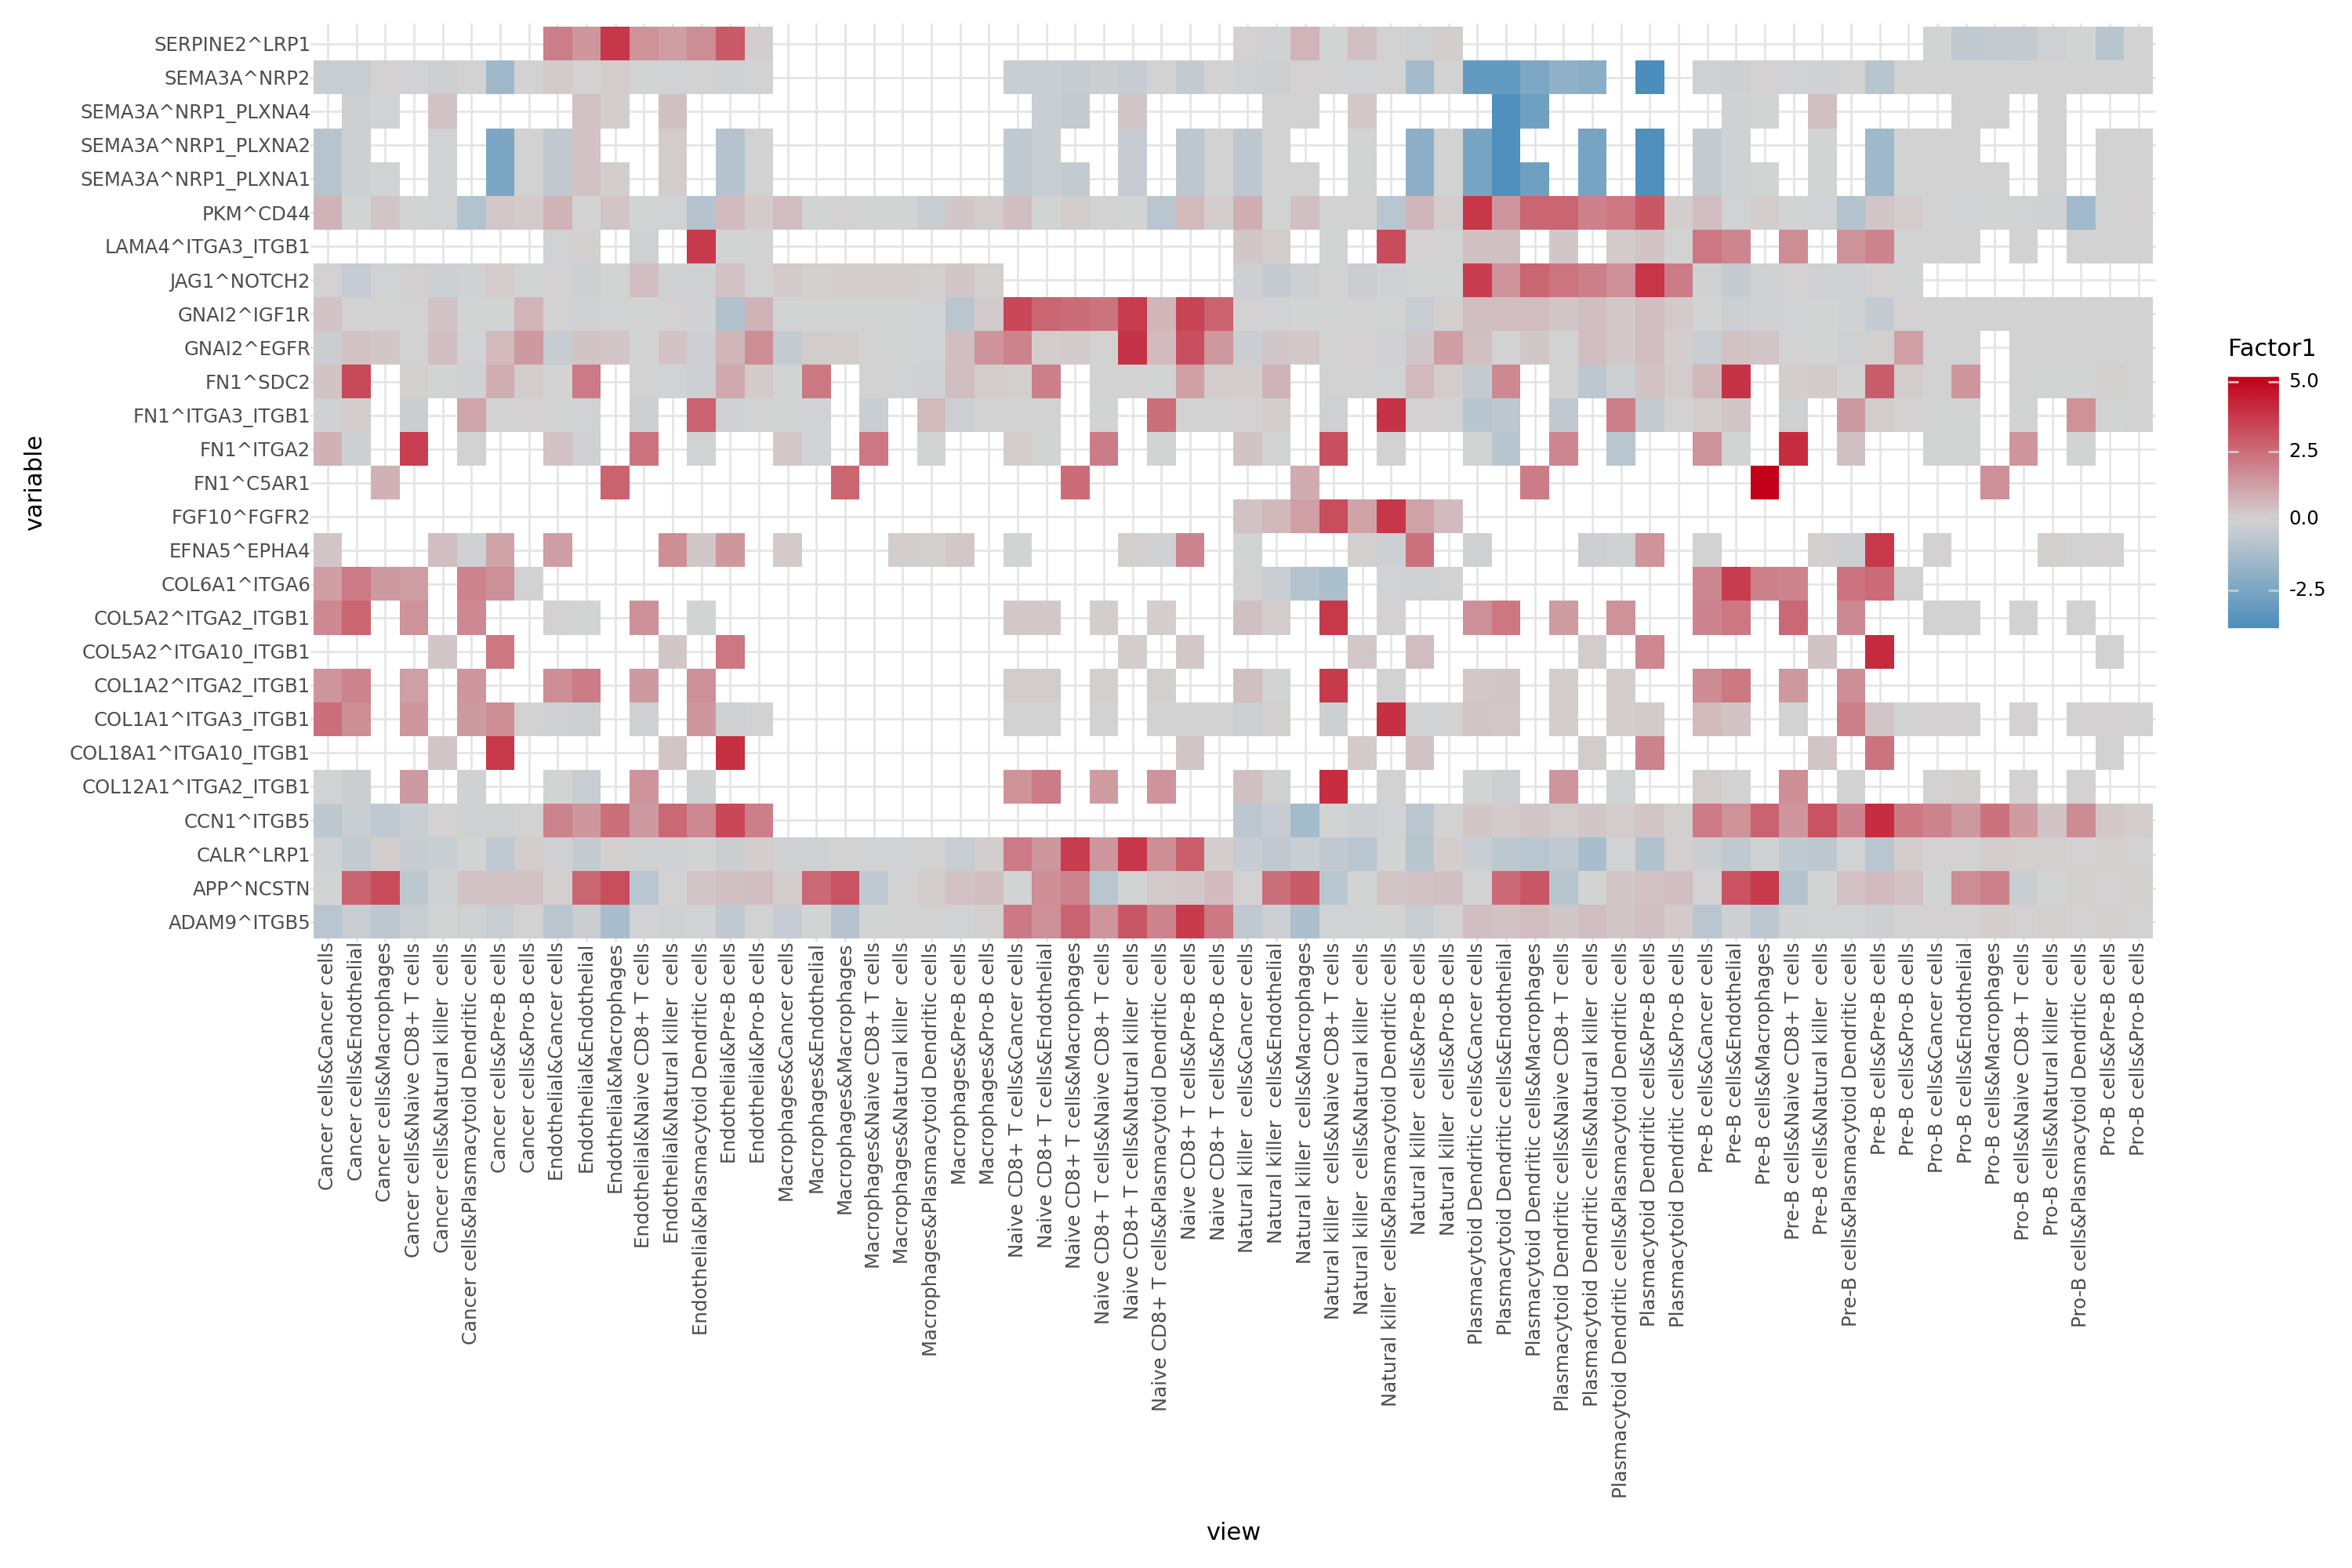

In [180]:
top_genes = variable_loadings['variable'].head(30)
top_loadings = variable_loadings[variable_loadings['variable'].isin(top_genes)]
# ^ Note that the genes with the lowest loadings are equally interesting

# plot them
# dotplot of variable, view, loadings
(p9.ggplot(top_loadings) +
 p9.aes(x='view', y='variable', fill='Factor1') +
 p9.geom_tile() +
 p9.scale_fill_gradient2(low='#1f77b4', mid='lightgray', high='#c20019') +
 p9.theme_minimal() +
 p9.theme(axis_text_x=p9.element_text(angle=90, hjust=0.5), figure_size=(15, 10))
 )

In [176]:
model = mofa.mofa_model("/root/workdir/HDAC_tfm/data/anndata/MOFA/mofatalk_kuv_2f.h5ad")
model

MOFA+ model: mofatalk kuv 2f.h5ad
Samples (cells): 4
Features: 28447
Groups: group1 (4)
Views: Cancer cells&Cancer cells (550), Cancer cells&Endothelial (570), Cancer cells&Macrophages (376), Cancer cells&Naive CD8+ T cells (527), Cancer cells&Natural killer  cells (575), Cancer cells&Plasmacytoid Dendritic cells (561), Cancer cells&Pre-B cells (569), Cancer cells&Pro-B cells (461), Endothelial&Cancer cells (405), Endothelial&Endothelial (442), Endothelial&Macrophages (294), Endothelial&Naive CD8+ T cells (417), Endothelial&Natural killer  cells (426), Endothelial&Plasmacytoid Dendritic cells (425), Endothelial&Pre-B cells (409), Endothelial&Pro-B cells (343), Macrophages&Cancer cells (268), Macrophages&Endothelial (270), Macrophages&Macrophages (226), Macrophages&Naive CD8+ T cells (283), Macrophages&Natural killer  cells (256), Macrophages&Plasmacytoid Dendritic cells (272), Macrophages&Pre-B cells (267), Macrophages&Pro-B cells (225), Naive CD8+ T cells&Cancer cells (382), Naive CD8

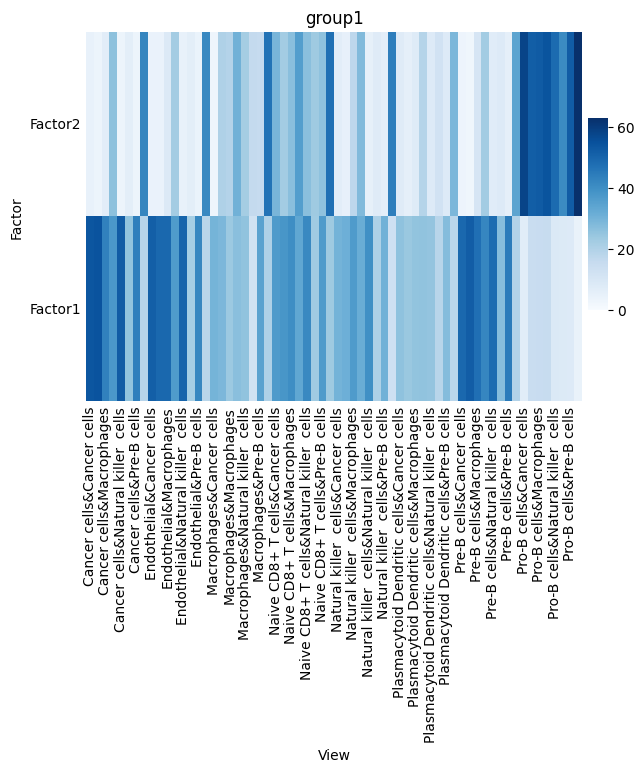

In [177]:
mofa.plot_r2(model, x='View')

In [186]:
variable_loadings =  li.ut.get_variable_loadings(mdata_k25l,
                                                 varm_key='LFs',
                                                 view_sep=':',
                                                 pair_sep="&",
                                                 variable_sep="^") # get loadings for factor 1
variable_loadings.head()

,ligand_complex,receptor_complex,source,target,Factor1,Factor2
25762,VEGFC,ITGB1,Naive CD8+ T cells,Endothelial,-5.947626,-3.269626e-170
24772,ANXA1,EGFR,Naive CD8+ T cells,Natural killer cells,-5.851155,2.183172e-170
27277,VEGFC,ITGA9,Naive CD8+ T cells,Macrophages,-5.716167,-2.733594e-170
24993,HSPG2,LRP1,Naive CD8+ T cells,Natural killer cells,-5.689423,2.181345e-170
26873,TIMP2,ITGB1,Naive CD8+ T cells,Cancer cells,-5.530159,-3.130942e-170


In [187]:
variable_loadings['size'] = 1

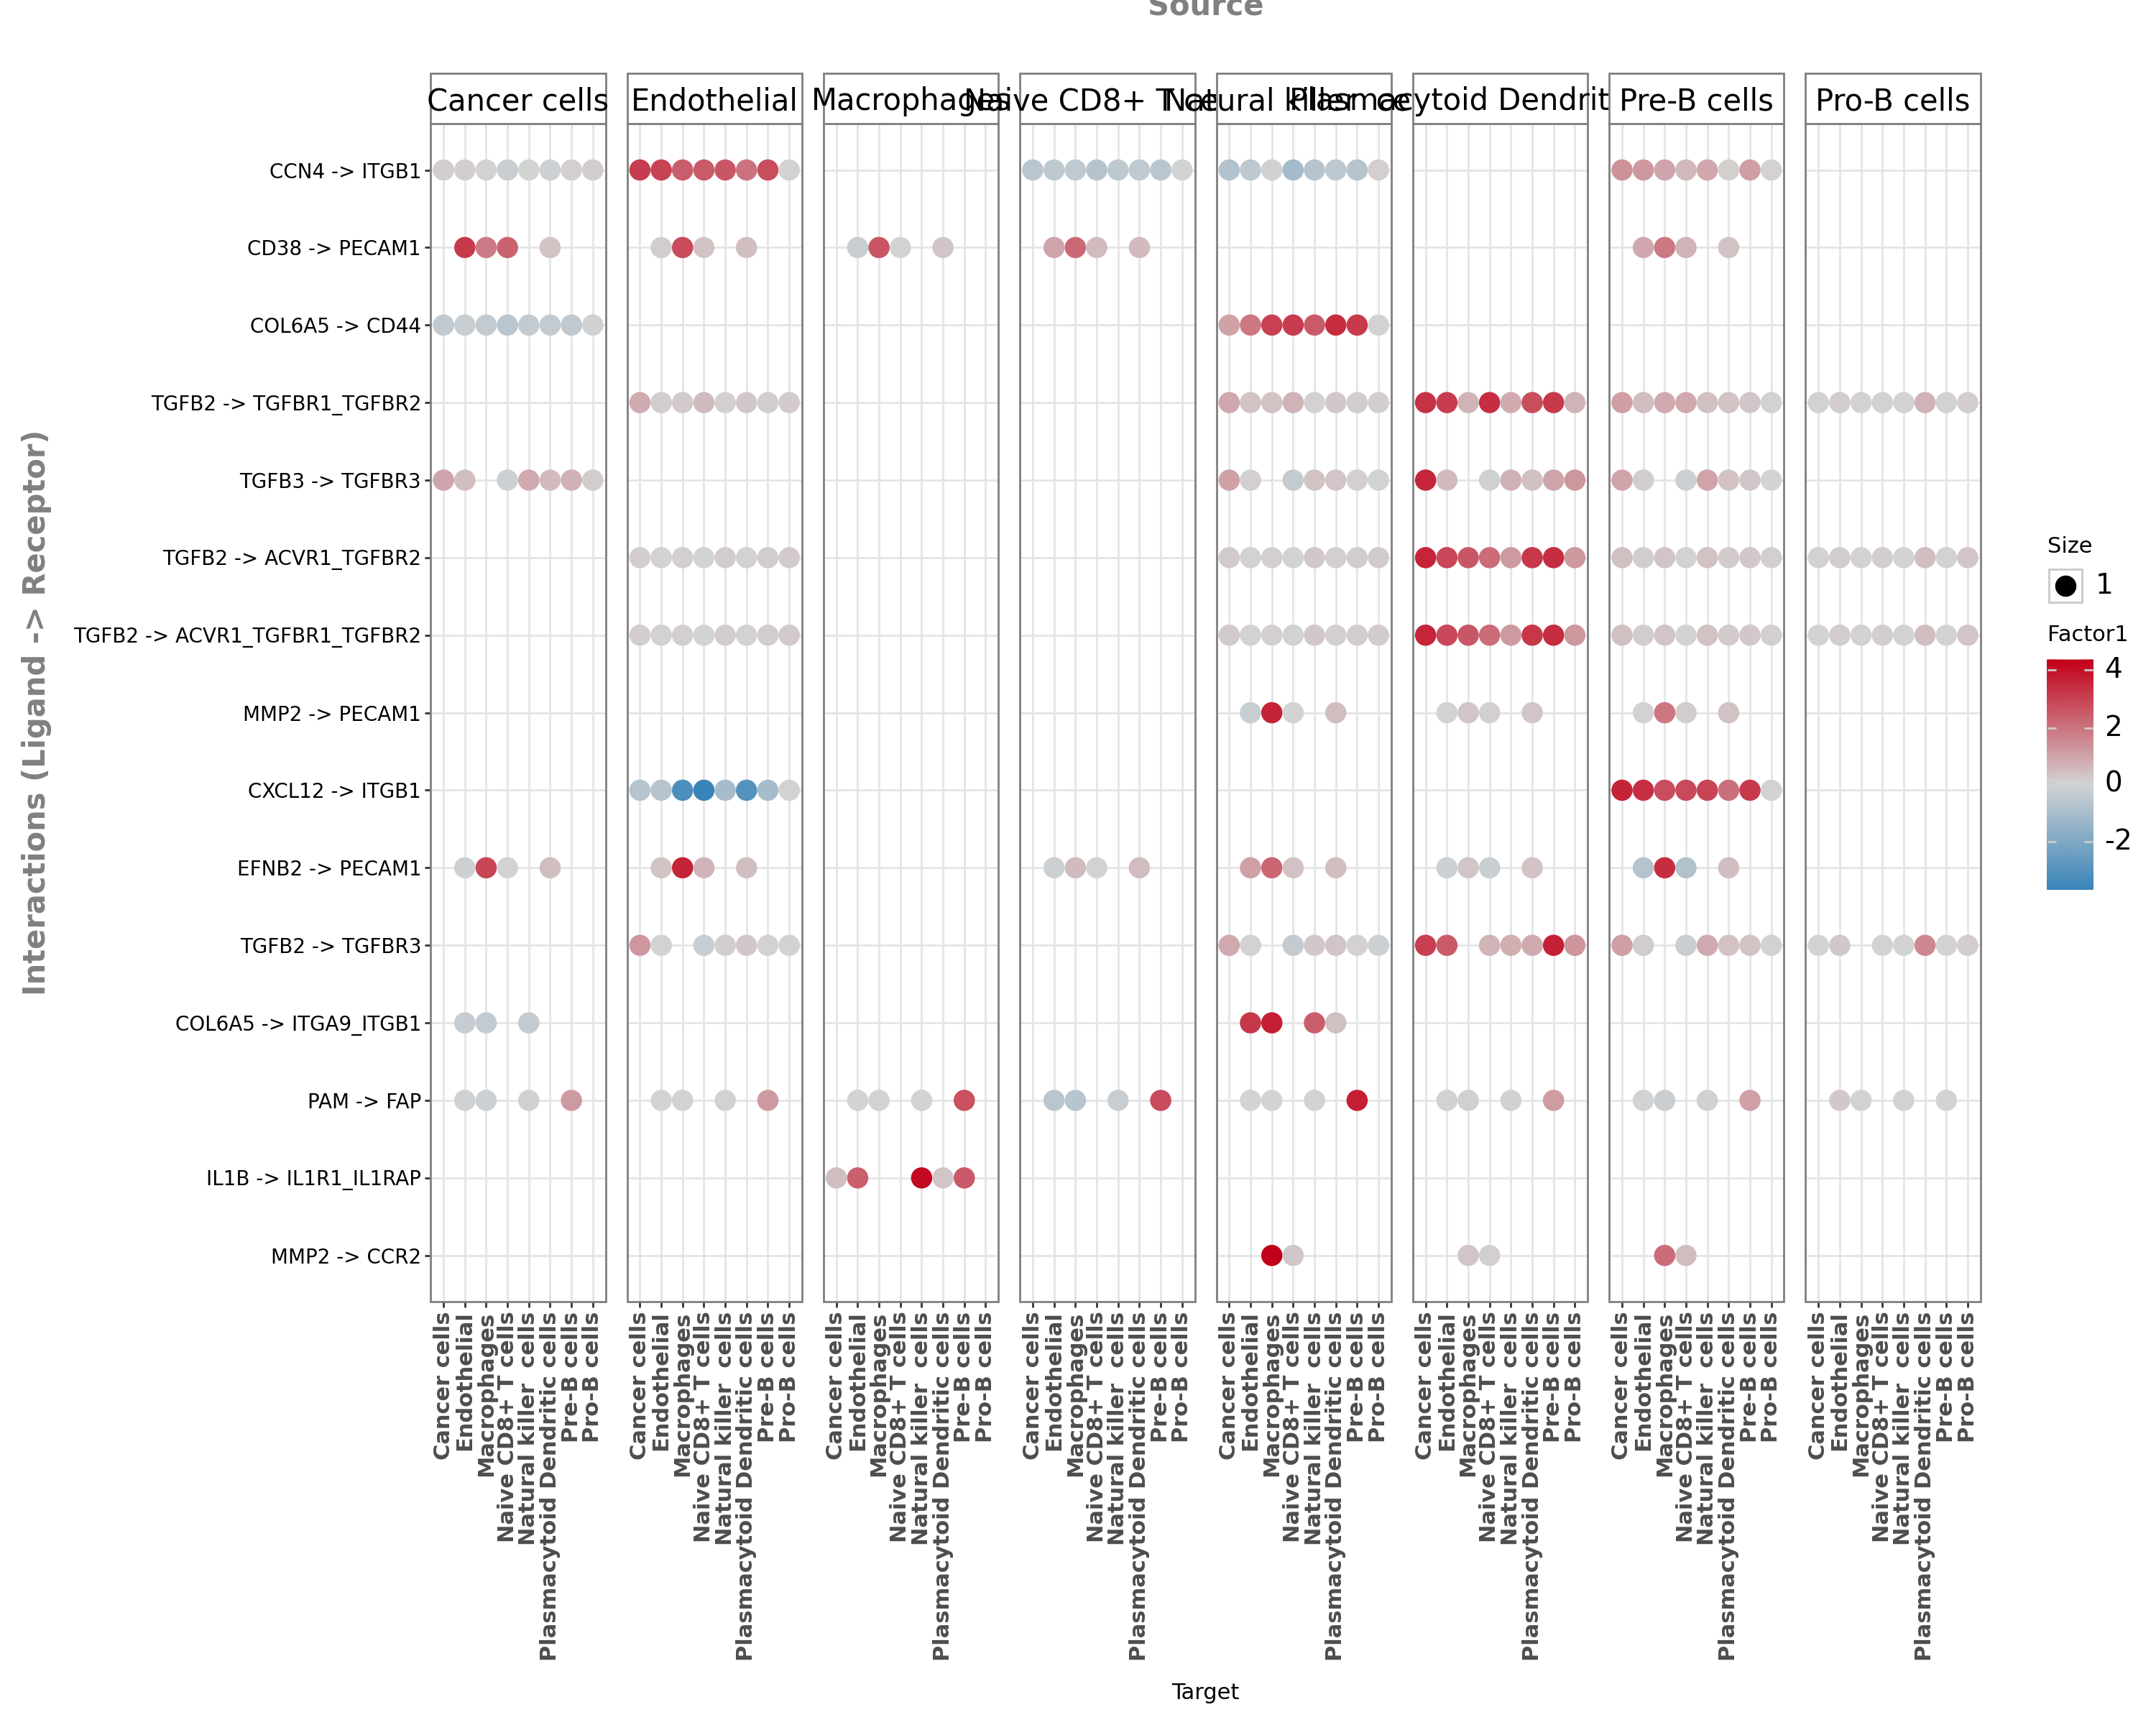

In [188]:
my_plot = li.pl.dotplot(liana_res = variable_loadings,
                        size='size',
                        colour='Factor1',
                        orderby='Factor1',
                        top_n=15,
                        orderby_ascending=False,
                        size_range=(0.1, 5),
                        figure_size=(15, 12)
                        )
# change colour, with mid as white
my_plot + p9.scale_color_gradient2(low='#1f77b4', mid='lightgray', high='#c20019')